In [5]:
import json
from qutip import *
import numpy as np
import scipy
import cmath
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import itertools
from numpy.random import seed
from numpy.random import rand
from itertools import product
from scipy.misc import derivative
from scipy import optimize
from functools import wraps
from time import time
from scipy.optimize import minimize
from matplotlib import gridspec


In [14]:
#How to read saved data
test = []
with open("TestJSON.json") as file:
    for line in file:
        test.append(json.loads(line))
cgdTime,cgdEngErr,cgdStateErr,edTime,hisIntlen = test

In [15]:
print(test)

[[10.18522047996521, 2.6652636528015137, 10.273927927017212, 5.070173263549805, 1.5100979804992676], [2.4000289064574076e-05, 8.88969604595502e-08, 4.8796072051215944e-05, 7.8233711509057e-08, 0.20712769397238473], [1.2326076965329946e-05, 2.7064851026992187e-08, 2.1490653571820673e-05, 4.142041842847277e-08, 0.0761316352800564], [0.0029611587524414062, 0.0008487701416015625, 0.0027730464935302734, 0.0008215904235839844, 0.0008537769317626953], 5]


Text(0, 0.5, 'Runtime')

<Figure size 576x396 with 0 Axes>

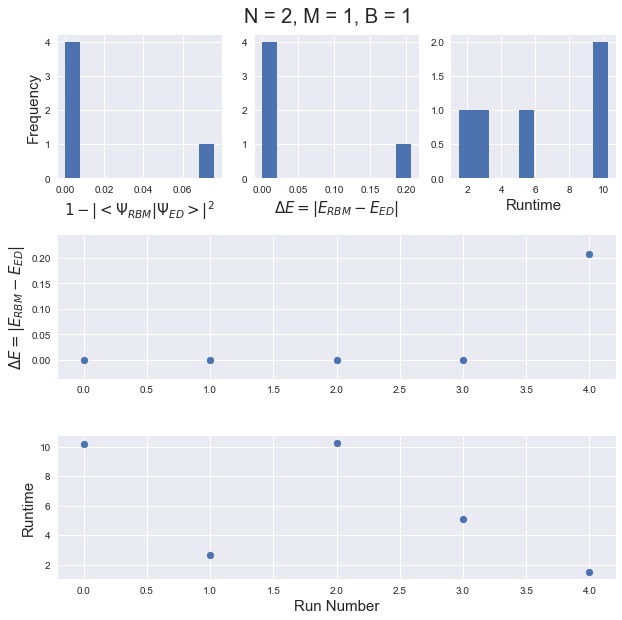

In [17]:
hisIt= np.arange(hisIntlen)
plt.figure(constrained_layout=True)
plt.figure(figsize=(10,10))
ttl = plt.suptitle("N = 2, M = 1, B = 1",size =20)
gs = gridspec.GridSpec(ncols=3, nrows=3, hspace = 0.4)
ttl.set_position([.5, 0.92])



ax1 = plt.subplot(gs[0, 0])
ax1 .hist(cgdStateErr, bins=10) 
ax1 .set_xlabel("$1-|<\Psi_{RBM}|\Psi_{ED}>|^2$",size = 15)
ax1.set_ylabel("Frequency",size = 15)



ax2 = plt.subplot(gs[0, 1])
ax2.hist(cgdEngErr, bins=10) 
ax2.set_xlabel("$\Delta E = |E_{RBM}-E_{ED}|$",size = 15)



ax3 = plt.subplot(gs[0, 2])
ax3.hist(cgdTime, bins=10) 
ax3.set_xlabel("Runtime",size = 15)


ax4 = plt.subplot(gs[1, :])
ax4.scatter(hisIt,cgdEngErr) 
ax4 .set_ylabel("$\Delta E = |E_{RBM}-E_{ED}|$", size = 15)


ax5 = plt.subplot(gs[2, :])
ax5.scatter(hisIt,cgdTime)  
ax5.set_xlabel("Run Number",size = 15)
ax5 .set_ylabel("Runtime", size = 15)












In [18]:
avEngErr = np.sum(cgdEngErr)/(len(hisIt))
avStateErr = np.sum(cgdStateErr)/(len(hisIt))
avRunTime = np.sum(cgdTime)/(len(hisIt))
print('Average Energy Error: ', avEngErr )
print('Average Ground State Error: ', avStateErr )
print('Average Run Time: ', avRunTime )

cutOff = 0.0001
runsCutOff = sum(i>cutOff for i in cgdEngErr)
prob = (runsCutOff/100)
print("Number of runs abover 0.0001 error:", runsCutOff )
print("Prob of sucess:",  f"{1-prob:.4f}" )
print("Prob of sucess two runs:", f"{1-prob**2:.4f}" )
print("Prob of sucess three runs:", f"{1-prob**3:.4f}" )




Average Energy Error:  0.0414401314928345
Average Ground State Error:  0.015233104099172601
Average Run Time:  5.940936660766601
Number of runs abover 0.0001 error: 1
Prob of sucess: 0.9900
Prob of sucess two runs: 0.9999
Prob of sucess three runs: 1.0000
